# Requirements

Target kolona 1/0, Missing values in three columns normal distribution but more on left side, MICE. Scaling the values with StandardScaler, train the model with KNeighborsClassifier. **Bad distribution of the dataset - Bad results**

In [ ]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [ ]:
# Add as many imports as you need.


# Laboratory Exercise - Run Mode (8 points)

## Introduction
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## The Water Potability Dataset

## Downloading the Water Potability Dataset

In [ ]:
!gdown 1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW
To: /content/water-potability.csv
100% 525k/525k [00:00<00:00, 93.2MB/s]


## Exploring the Water Potability Dataset
The Water Potability dataset contains water quality metrics for 3276 different water bodies. The dataset includes ten attributes, each providing valuable information about water characteristics. These attributes encompass pH value, hardness, total dissolved solids (TDS), chloramines, sulfate concentration, conductivity, organic carbon, trihalomethanes, turbidity, and the target variable, potability. pH value is crucial for assessing the acid–base balance, while hardness indicates the presence of calcium and magnesium salts. TDS measures the mineral content, chloramines are disinfectants, sulfate is a natural substance found in minerals, conductivity indicates water's ability to conduct electric current, organic carbon measures carbon in organic compounds, and trihalomethanes are chemicals found in chlorine-treated water. Turbidity assesses the quantity of solid matter in suspended state. The target variable, 'Potability,' is binary (1 for potable and 0 for not potable), indicating whether water is safe for human consumption.

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('/content/water-potability.csv')

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Explore the dataset using visualizations of your choice.

<Axes: ylabel='Frequency'>

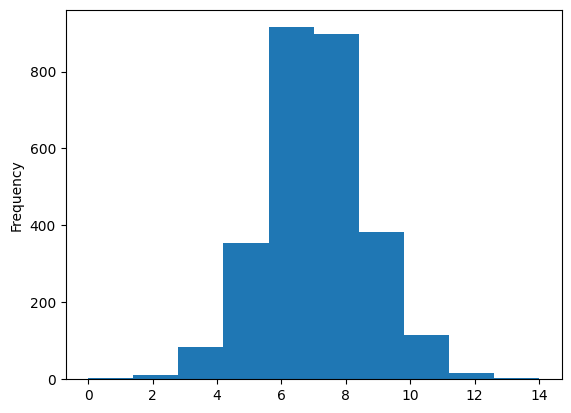

In [ ]:
# Write your code here. Add as many boxes as you need.
data['ph'].plot.hist()

<Axes: ylabel='Frequency'>

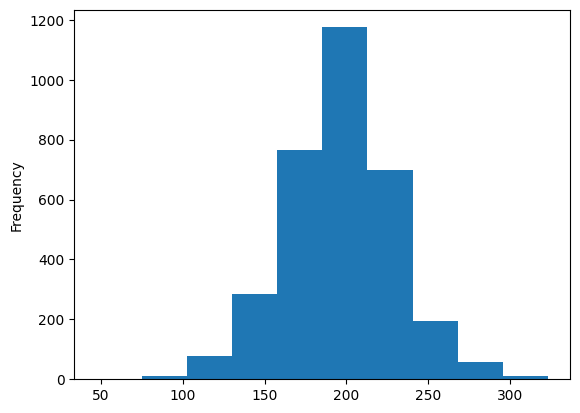

In [ ]:
data['Hardness'].plot.hist()

<Axes: ylabel='Frequency'>

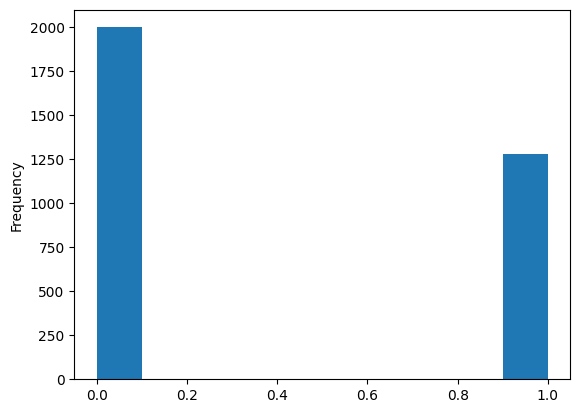

In [ ]:
data['Potability'].plot.hist()

Check if the dataset is balanced.

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# Write your code here. Add as many boxes as you need.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


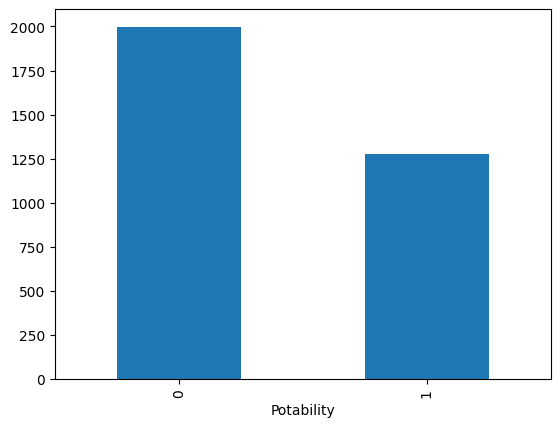

In [ ]:
data['Potability'].value_counts().plot.bar()
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Write your code here. Add as many boxes as you need.
missing = (data.isnull().sum()/len(data)) *100
missing

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

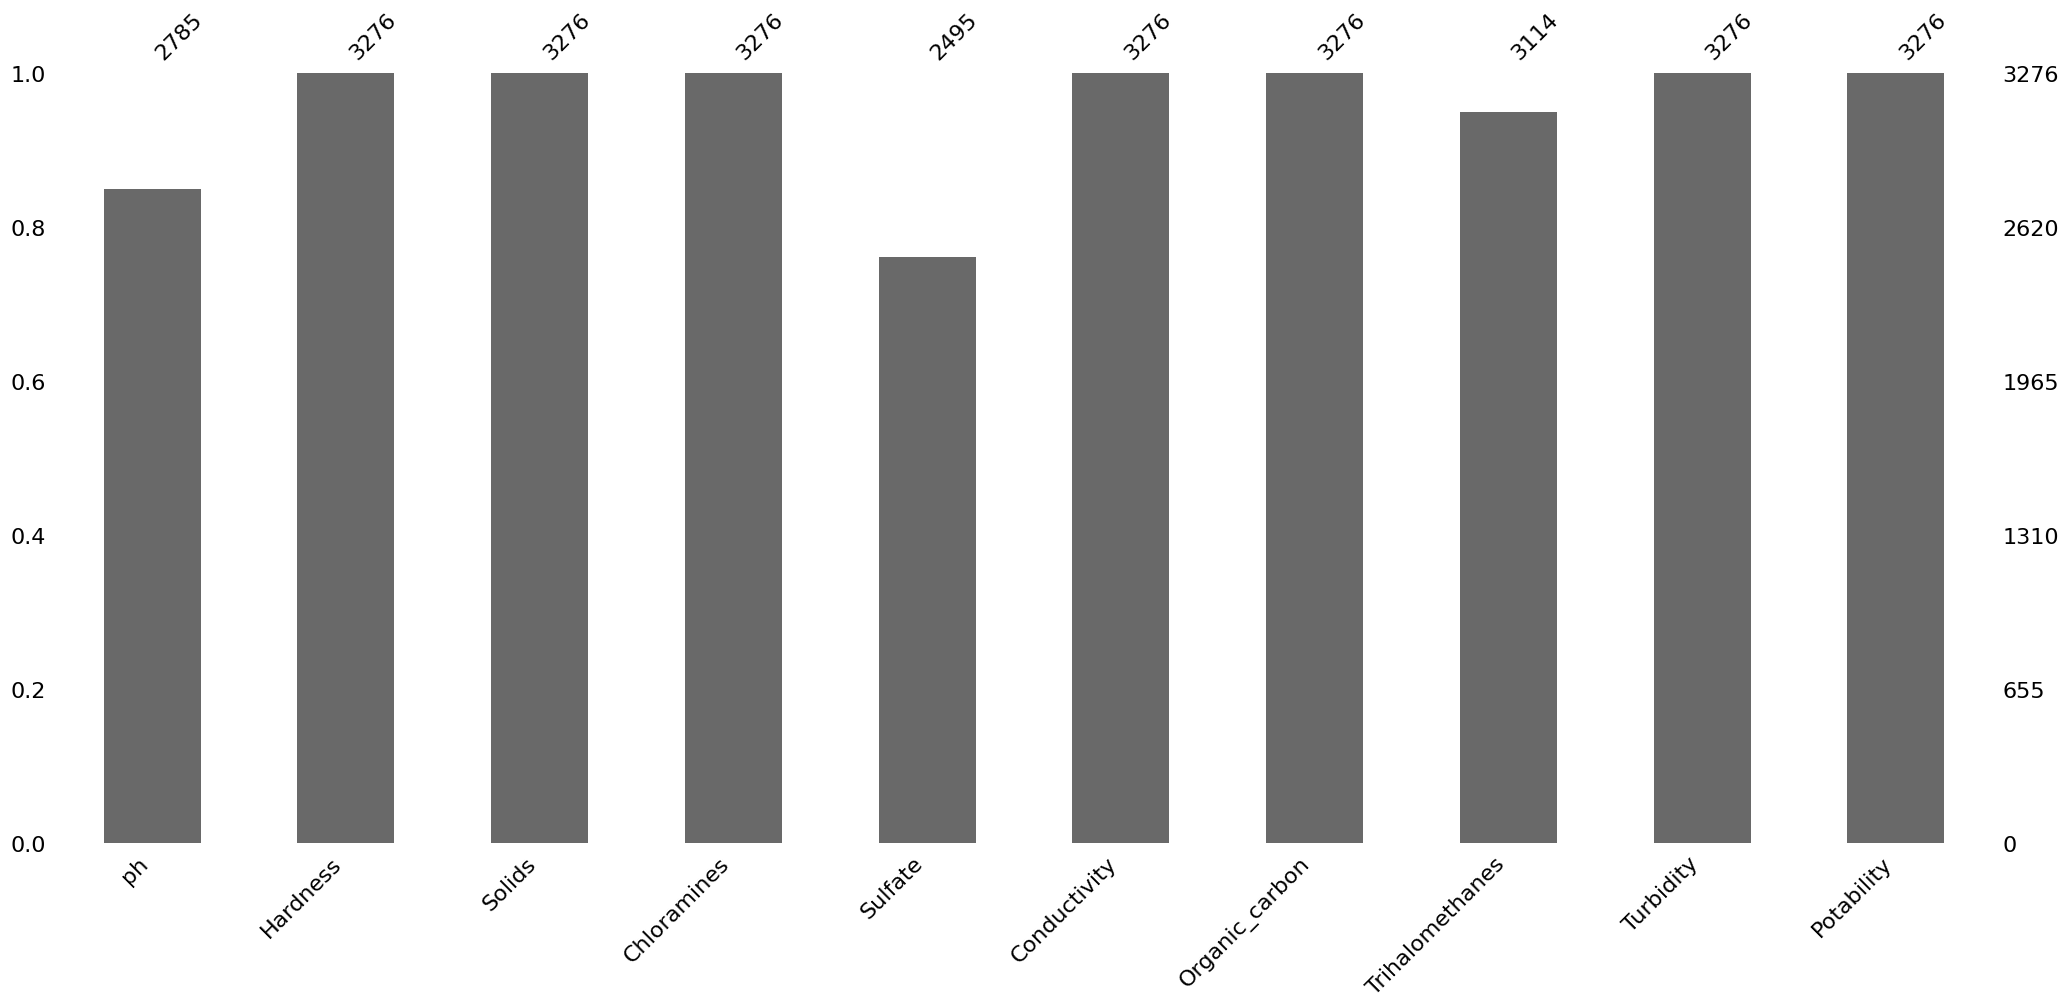

In [ ]:
# Write your code here. Add as many boxes as you need.
msno.bar(data)

<Axes: >

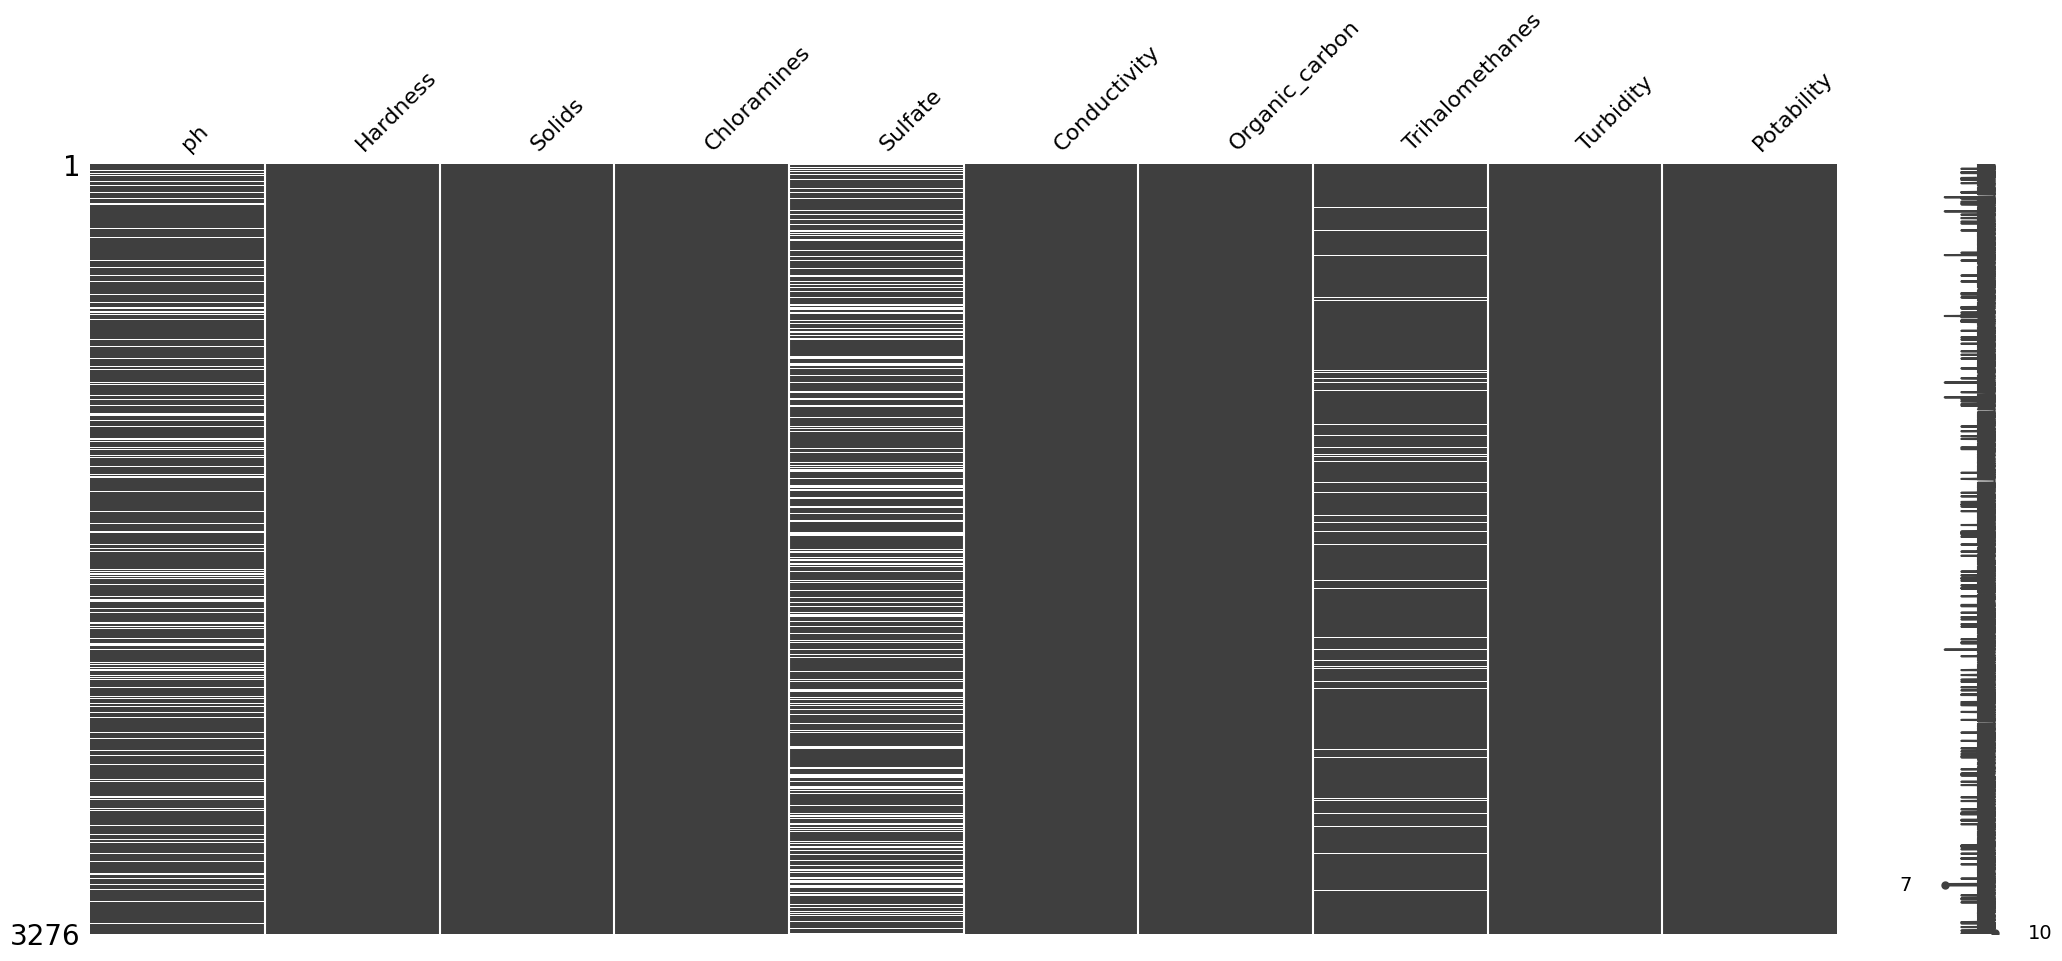

In [ ]:
msno.matrix(data)

<Axes: >

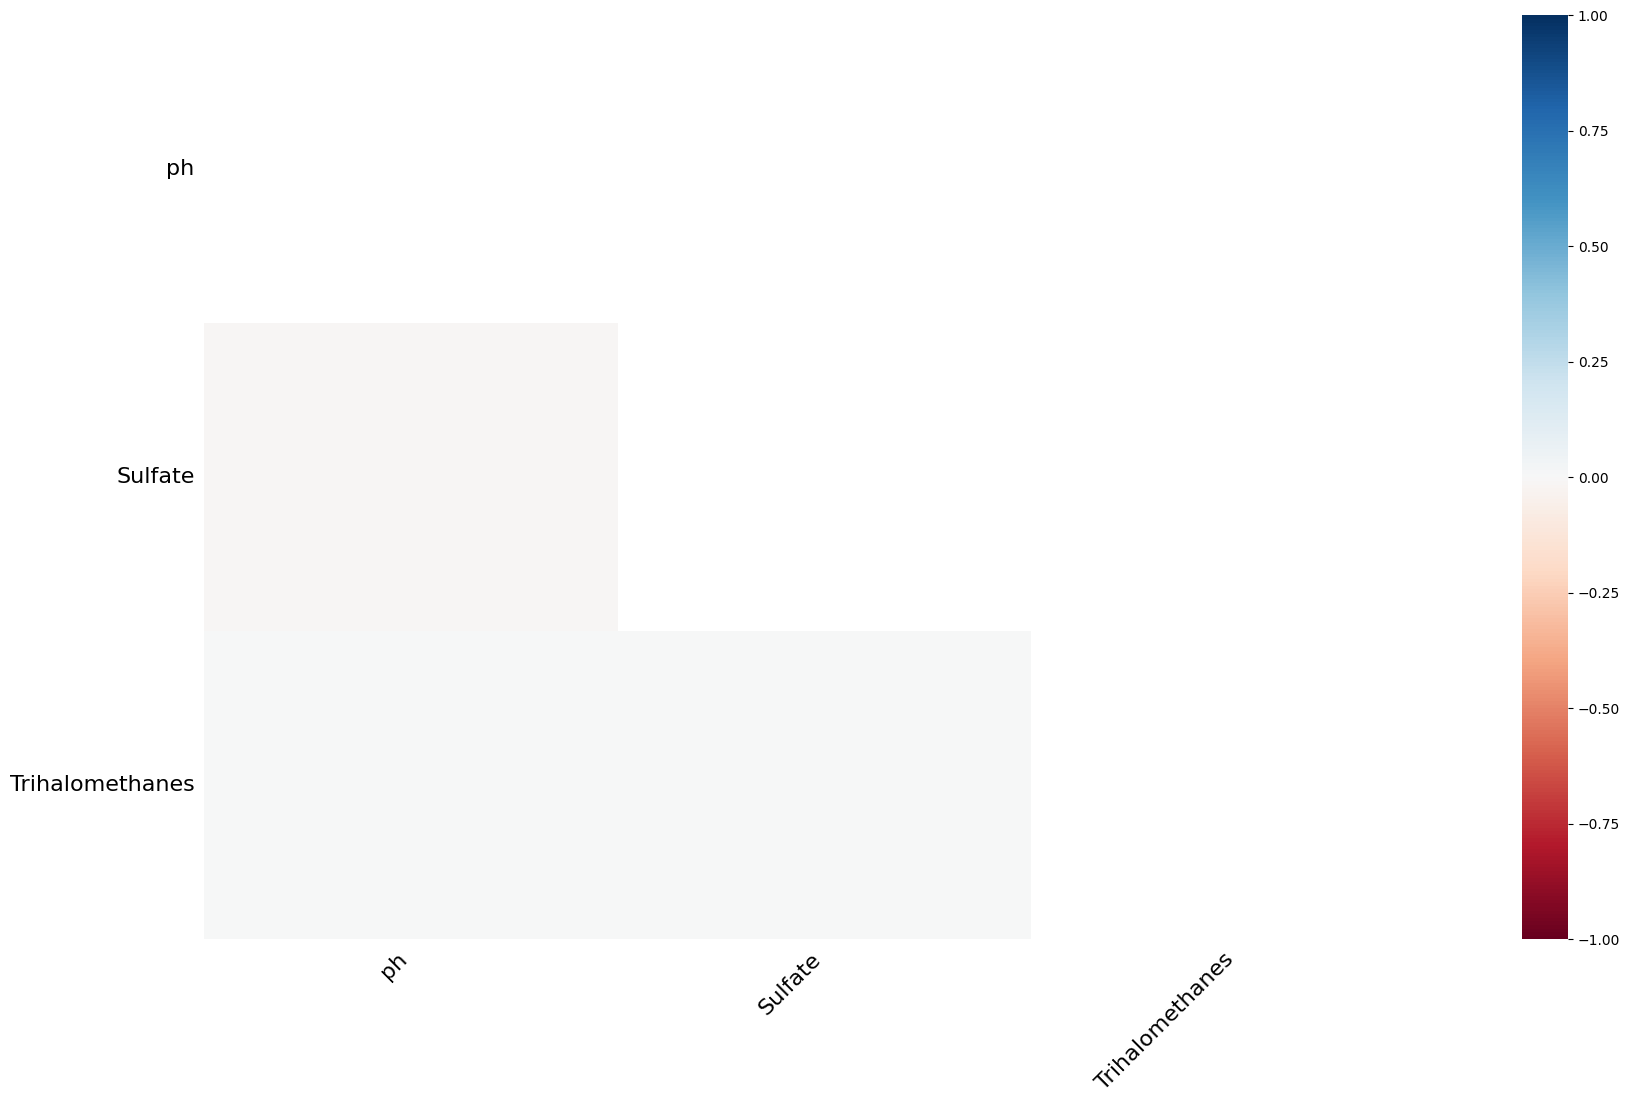

In [ ]:
msno.heatmap(data)

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

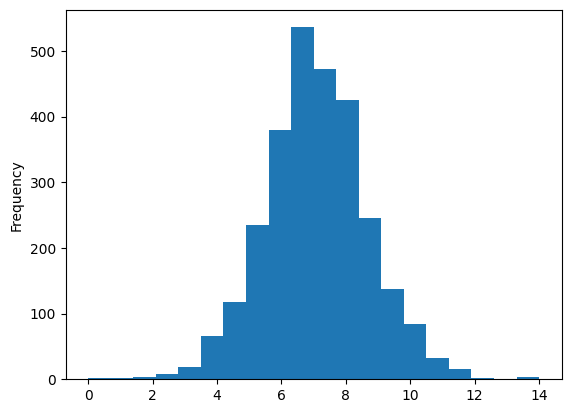

In [ ]:
data['ph'].plot.hist(bins=20)
plt.show()

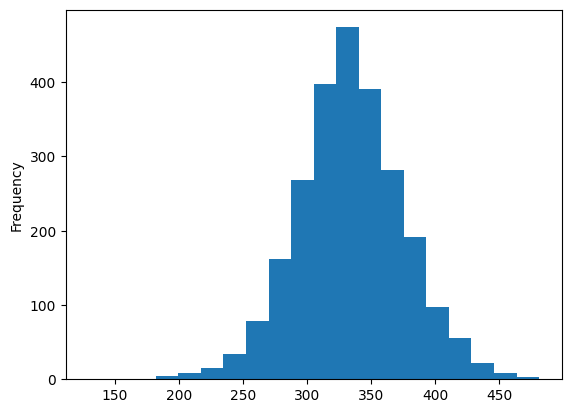

In [ ]:
data['Sulfate'].plot.hist(bins=20)
plt.show()

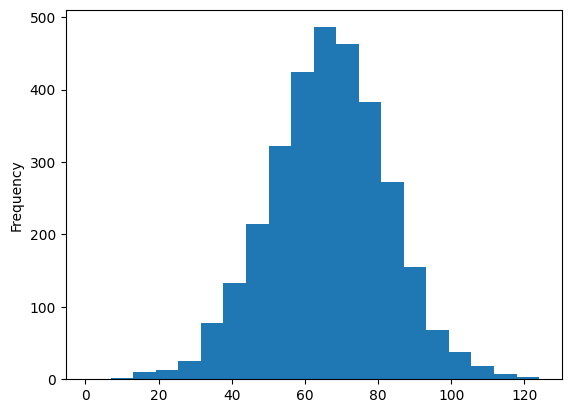

In [ ]:
data['Trihalomethanes'].plot.hist(bins=20)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.
#data['ph'] = data['ph'].fillna(value=data['ph'].mean())

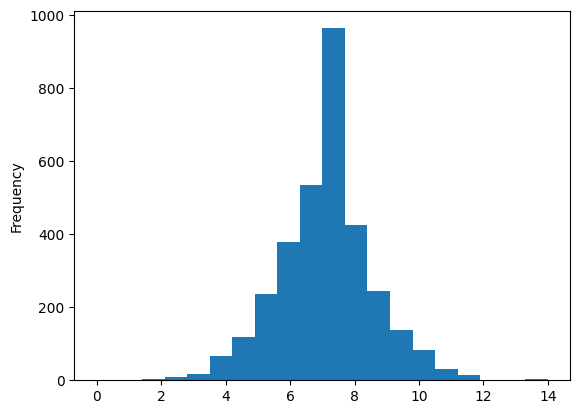

In [ ]:
#IMA DRASTICNA RAZLIKA
#data['ph'].plot.hist(bins=20)
#plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
data[['ph', 'Sulfate', 'Trihalomethanes']] = mice_imputer.fit_transform(data[['ph', 'Sulfate', 'Trihalomethanes']])

In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.
X, Y = data.drop(columns=['Potability']), data['Potability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape

(2620, 9)

In [ ]:
Y_train.shape

(2620,)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
Y_pred = classifier.predict(X_test)

In [ ]:
Y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
print(confusion_matrix(Y_test, Y_pred))

[[318  81]
 [147 110]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       399
           1       0.58      0.43      0.49       257

    accuracy                           0.65       656
   macro avg       0.63      0.61      0.61       656
weighted avg       0.64      0.65      0.64       656



In [ ]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [ ]:
even_df = pd.concat([data[data['Potability'] == 0][: 1278], data[data['Potability'] == 1]], axis=0)

In [ ]:
even_df['Potability'].value_counts()

Potability
0    1278
1    1278
Name: count, dtype: int64

In [ ]:
even_df.shape

(2556, 10)

In [ ]:
t = even_df.copy()
t.drop('Potability', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns[1:]],  even_df['Potability'], test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
Y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[144 102]
 [113 153]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       247
           1       0.59      0.56      0.58       265

    accuracy                           0.57       512
   macro avg       0.57      0.57      0.57       512
weighted avg       0.58      0.57      0.57       512



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features using `StandardScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.